In [1]:
#Hack to fix missing PROJ4 env var
import os
#import conda

conda_file_dir = '/anaconda/envs/DSFP/lib/python3.6/site-packages/pyproj'
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

In [2]:
#import necessary modules
from pyhdf import SD
import numpy as np
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import sys
import h5py
import time
import calendar

In [3]:
def load_modis_data(filename):
    hdf=SD.SD(filename)
    return hdf

In [4]:
def JulianDate_to_MMDDYYYY(y,jd):
    month = 1
    day = 0
    while jd - calendar.monthrange(y,month)[1] > 0 and month <= 12:
        jd = jd - calendar.monthrange(y,month)[1]
        month = month + 1
    return month,jd,y

def grok_modis_file(filename):
    filename_arr = filename.split(".")
    #what kind of MODIS data is it
    obs_name = ''
    if 'MOD04' in filename_arr[0]:  
        obs_name='Terra'
    if 'MYD04' in filename_arr[0]: 
        obs_name='Aqua'
    #when was this file observed
    obs_datejd = filename_arr[1]
    obsyr = int(obs_datejd[1:5])
    obsdy = int(obs_datejd[5:])
    obs_date = JulianDate_to_MMDDYYYY(obsyr,obsdy)
    obs_time = filename_arr[2]
    obs_collection = filename_arr[3]
    obs_proccode = filename_arr[4]
    return obs_name, obs_date, obs_time

In [52]:
def plot_modis_data(filename):
    # Get lat and lon info
    hdf = load_modis_data(filename)
    lat = hdf.select('Latitude')
    latitude = lat[:]
    min_lat=latitude.min()
    max_lat=latitude.max()
    lon = hdf.select('Longitude')
    longitude = lon[:]
    min_lon=longitude.min()
    max_lon=longitude.max()

    #get high quality land data
    SDS_NAME='Image_Optical_Depth_Land_And_Ocean'
    sds=hdf.select(SDS_NAME)

    #get scale factor for AOD SDS
    attributes=sds.attributes()
    scale_factor=attributes['scale_factor']
    #get valid range for AOD SDS
    range=sds.getrange()
    min_range=min(range)
    max_range=max(range)
    
    #get SDS data
    data=sds.get()
    
    #get data within valid range
    valid_data=data.ravel()
    valid_data=[x for x in valid_data if x>=min_range]
    valid_data=[x for x in valid_data if x<=max_range]
    valid_data=np.asarray(valid_data)

    #scale the valid data
    valid_data=valid_data*scale_factor

    #find the average
    average=sum(valid_data)/len(valid_data)

    #find the standard deviation
    stdev=np.std(valid_data)
    attrs = sds.attributes(full=1)
    fillvalue=attrs['_FillValue']

    # fillvalue[0] is the attribute value (-9999)
    fv = fillvalue[0]

    #turn fillvalues to NaN
    data=data.astype(float)
    data[data == fv] = np.nan

    #create the map
    data = np.ma.masked_array(data, np.isnan(data))
    m = Basemap(projection='cyl', resolution='l', llcrnrlat=min_lat, urcrnrlat = max_lat, llcrnrlon=min_lon, urcrnrlon = max_lon)
    m.drawcoastlines(linewidth=0.5)
    m.drawparallels(np.arange(-90., 120., 5.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180., 181., 5.), labels=[0, 0, 0, 1])
    x, y = m(longitude, latitude)
    im = m.pcolormesh(x, y, data*scale_factor, cmap=plt.cm.viridis)
    plt.autoscale()
    #create colorbar
    #cb = m.colorbar(im,"right", size="5%", pad="2%")
    #label colorboar
    #cb.set_label('AOD')

    #title the plot
    #plotTitle=filename[:-4]
    modisInfo = grok_modis_file(filename)
    plotTitle=str(modisInfo)
    plt.title('{0}\n {1}'.format(plotTitle, SDS_NAME))
    fig = plt.gcf()

    # Show the plot window.
    plt.show()

In [53]:
print(grok_modis_file('MYD04_L2.A2017249.2105.006.2017250160535.hdf'))

('Aqua', (9, 6, 2017), '2105')


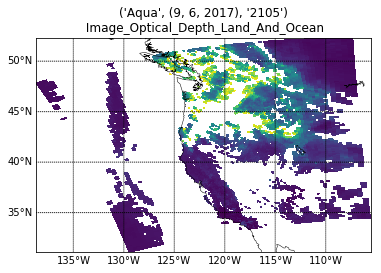

In [54]:
plot_modis_data('MYD04_L2.A2017249.2105.006.2017250160535.hdf')

In [55]:
text_file = open("fileList", "r")
files = text_file.readlines()

In [56]:
for file in files:
    print(grok_modis_file(file))

('Aqua', (10, 8, 2017), '2105')
('Aqua', (10, 9, 2017), '2010')
('Aqua', (10, 9, 2017), '2145')
('Aqua', (10, 9, 2017), '2150')
('Aqua', (9, 6, 2017), '2105')
('Aqua', (10, 8, 2017), '2105')
('Aqua', (10, 9, 2017), '2010')
('Aqua', (10, 9, 2017), '2145')
('Aqua', (10, 9, 2017), '2150')


In [57]:
print(files[4])

MYD04_L2.A2017249.2105.006.2017250160535.hdf



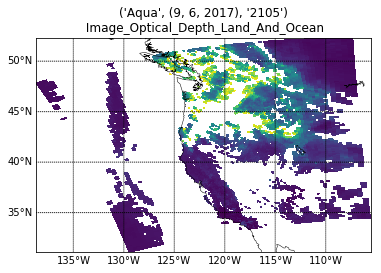

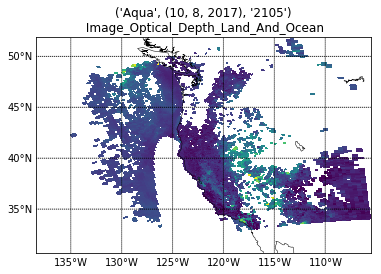

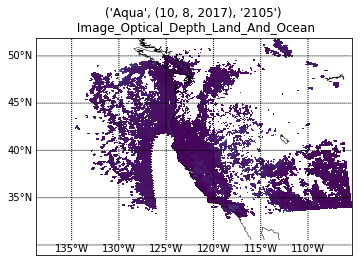

In [59]:
plot_modis_data("MYD04_L2.A2017249.2105.006.2017250160535.hdf")
plot_modis_data("MYD04_L2.A2017281.2105.006.2017282154132.hdf")

In [41]:
ls

MODIS_test_notebook.ipynb
MYD04_3K.A2017281.2105.006.2017282153727.hdf
MYD04_3K.A2017282.2010.006.2017283154914.hdf
MYD04_3K.A2017282.2145.006.2017283153759.hdf
MYD04_3K.A2017282.2150.006.2017283153744.hdf
MYD04_L2.A2017249.2105.006.2017250160535.hdf
MYD04_L2.A2017281.2105.006.2017282154132.hdf
MYD04_L2.A2017282.2010.006.2017283155401.hdf
MYD04_L2.A2017282.2145.006.2017283153915.hdf
MYD04_L2.A2017282.2150.006.2017283153836.hdf
fileList
